In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_classification

def visualize(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if len(clf.support_vectors_):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

# create not nicely separable points
# C >= 1 for hard margin
# C =  0.01 for soft margin
X, y = make_classification(n_samples=50,n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1,
                           random_state=10)

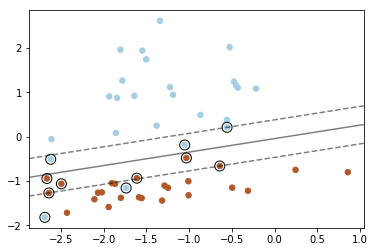

In [2]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)
visualize(X,y,clf)

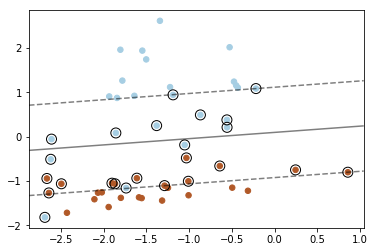

In [3]:
clf = svm.SVC(kernel='linear', C=.1)
clf.fit(X, y)
visualize(X,y,clf)

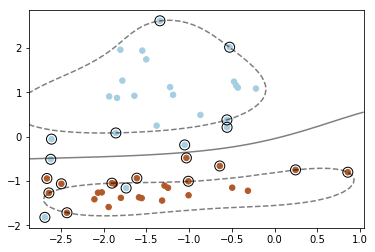

In [4]:
clf = svm.SVC(kernel='rbf', C=1, gamma="auto")
clf.fit(X, y)
visualize(X,y,clf)

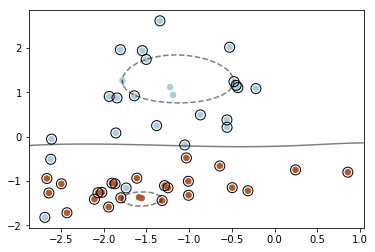

In [5]:
clf = svm.SVC(kernel='rbf', C=.1, gamma="auto")
clf.fit(X, y)
visualize(X,y,clf)

The feature map
$$
    \varphi: (x_1, x_2) \mapsto (x^2_1, x^2_2, \sqrt(2)x_1 x_2)
$$
leads to the kernel
$$
    \varphi^\top(x)\varphi(y) = x^2_1 y^2_1 + x^2_2 y^2_2 + \sqrt(2)x_1 x_2 \sqrt(2)y_1 y_2 = (x^\top y)^2
$$

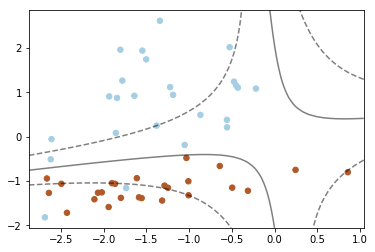

In [8]:
def custom_kernel(X,Y):
    return (X@Y.transpose())**2
clf = svm.SVC(kernel=custom_kernel, C=.1)
clf.fit(X, y)
visualize(X,y,clf)